In [ ]:
import numpy as np
import zipfile
import os
import cv2
import shutil
import nltk
import re
import sys

import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from gensim.models import KeyedVectors
from keras.preprocessing.text import Tokenizer
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from gensim.models.fasttext import FastText
from google.colab import drive
drive.mount('/content/gdrive')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
shutil.unpack_archive("/content/gdrive/MyDrive/aclImdb2_v1.tar.gz", "DataMining/lab3")

#Extract the data

In [ ]:
!tar -xvf  '/content/gdrive/MyDrive/aclImdb2_v1.tar.gz' -C 'DataMining/lab3'

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [ ]:
def read_text_file(file_path):
  data =""
  with open(file_path, 'r') as f:
      data = f.read()
      # print(f.read())
  return data

In [ ]:

def storeData(folder, label):
  train_data = []
  train_label = []
  os.chdir(folder)
  for file in os.listdir():
      train_data.append(read_text_file(file))
      train_label.append(label)
  return train_data, train_label
  

In [ ]:
train_data, train_label = storeData('/content/DataMining/lab3/aclImdb/train/neg',0) # label zero for negative statement. 
temp_train, temp_label = storeData('/content/DataMining/lab3/aclImdb/train/pos',1) # label one for positive statement.
train_data.extend(temp_train) 
train_label.extend(temp_label)

# for test..
test_data, test_label = storeData('/content/DataMining/lab3/aclImdb/test/neg',0) # label zero for negative statement. 
test_pos, test_label_pos = storeData('/content/DataMining/lab3/aclImdb/test/pos',1) # label one for positive statement.
test_data.extend(test_pos) 
test_label.extend(test_label_pos)
# print(len(test_data))
# print(len(train_label))
# print(train_label[0])

#Shuffle the train data

In [ ]:
shuffle_data = list(zip(train_data , train_label))
np.random.shuffle(shuffle_data)
train_data, train_label  = zip(*shuffle_data)

#Apply Text Pre-processing:
 Check NLTK for available text-preprocessing operations such as:

1. tokenization.
2. stop words removal.
3. stemming.
4. lemmatization, etc

* First, Clean the traing data.

> 1.  remove the HTML tages.




In [ ]:
def remove_html_tages(sentence):
    soup = BeautifulSoup(sentence, "html.parser")
    return soup.get_text()

> 2.  remove the punctuation.

In [ ]:
def remove_punctuation(sentence):
  s = re.sub(r'[^\w\s]',' ',sentence)
  s = re.sub(r'[0-9]',' ',s)
  return s

> 3.  remove the emoji.

In [ ]:
def remove_emoji(sentence):
  emoji_pattern = re.compile("["
                          u"\U0001F600-\U0001F64F"  # emoticons
                          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                          u"\U0001F680-\U0001F6FF"  # transport & map symbols
                          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                          u"\U00002702-\U000027B0"
                          u"\U000024C2-\U0001F251"
                          "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', sentence)

*    Second, use the Tokenization method



In [ ]:
def tokenization (sentence):
  tokens = nltk.word_tokenize(sentence)
  return tokens


*    Third, removing the stop words





In [ ]:
stop_words = stopwords.words('english')

In [ ]:
def remove_stopwords(word):
  if word not in stop_words:
      return True
  else: return False

*    Then, use lemmatization method.

In [ ]:
def lemmatization(word):
 lemmatizer = WordNetLemmatizer()
 new_word = lemmatizer.lemmatize(word)
 return new_word

*  Finally, apply all of them to get Clean Data.

In [ ]:
def pre_processing_data (data):
  clean_train_data = []
  tokenized_clean_train_data = []
  for review in data :
    review = review.lower()
    review = remove_html_tages(review)
    review = remove_punctuation(review)
    review = remove_emoji(review)
    tokenized_review = tokenization (review)
    new_tokenized_review = []
    for word in tokenized_review:
      if (remove_stopwords(word)):
        word = lemmatization(word)
        new_tokenized_review.append(word)
    clean_train_data.append(' '.join(new_tokenized_review))
    tokenized_clean_train_data.append(new_tokenized_review)
  return clean_train_data, tokenized_clean_train_data

In [ ]:
def get_tokens(data):
  tokenized_data = []
  for review in data :
    tokenized_review = tokenization(review)
    tokenized_data.append(tokenized_review)
  return tokenized_data

### Split data to train set and validation set

In [ ]:
def split_matrix(data):
  validation = data[:2500]
  validation_label = train_label[:2500]
  new_train = data[2500:]
  new_train_label = train_label[2500:]
  return new_train, new_train_label, validation, validation_label

In [ ]:
new_train, new_train_label, validation_data, validation_label = split_matrix(train_data)

## Pre-Processing Data

**The train data after Pre_Processing:**

In [ ]:
prepared_train_data, tokenized_prepared_train_data = pre_processing_data(new_train)

**The validation data after Pre_Processing:**

In [ ]:
prepared_validation_data, tokenized_prepared_validation_data = pre_processing_data(validation_data)

**The test data after Pre_Processing:** 

In [ ]:
prepared_test_data, tokenized_prepared_test_data = pre_processing_data(test_data)

## Without Pre-Processing Data 

In [ ]:
tokenized_train = get_tokens(new_train)
tokenized_test = get_tokens(test_data)
tokenized_validation = get_tokens(validation_data)


# 2- Create a Data Matrix



**For traditional methods**, use sklearn feature vectorizer (Count, TF-IDF) to create the required feature vector.

### Count Method (BOW)

In [ ]:
def matrixWithBOW(data, test, validation): 
  vectorizer = CountVectorizer()
  #transformed train reviews
  BOW_train=vectorizer.fit_transform(data)
  #transformed test reviews
  BOW_test=vectorizer.transform(test)
  #transformed validation reviews
  BOW_validation=vectorizer.transform(validation)
  return BOW_train, BOW_test, BOW_validation

### TF-IDF Method <br>
**Term Frequency** gives us the frequency of the word in each document. It is the ratio of number of times the word appears in a document compared to the total number of words in that document.

**Inverse Data Frequency** used to calculate the weight of rare words across all documents. The words that occur rarely have a high IDF score.

In [ ]:
def matrixWithTF(data, test, validation):
  vectorizer=TfidfVectorizer()
  #transformed train reviews
  tfidf_train=vectorizer.fit_transform(data)
  #transformed test reviews
  tfidf_test=vectorizer.transform(test)
  #transformed validation reviews
  tfidf_validation=vectorizer.transform(validation)
  return tfidf_train, tfidf_test, tfidf_validation

**For embedding methods**, use Gensim library for obtaining fasttext word embedding.

First, load the pre-trained fastText model

In [ ]:
!unzip '/content/gdrive/MyDrive/wiki-news-300d-1M.vec.zip' -d 'wiki'

Archive:  /content/gdrive/MyDrive/wiki-news-300d-1M.vec.zip
  inflating: wiki/wiki-news-300d-1M.vec  


In [ ]:
def fastText():
  model_ft = KeyedVectors.load_word2vec_format('wiki/wiki-news-300d-1M.vec', binary=False)
  return model_ft
model_ft = fastText()

In [ ]:
def get_embedding_matrix(data):
  EMBEDDING_DIM = 300
  MAX_NUM_WORDS = 10
  matrix = []
  # finally, vectorize the text samples into a 2D integer tensor
  for i in range (len(data)):
    tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
    tokenizer.fit_on_texts(data[i])
    sequences = tokenizer.texts_to_sequences(data[i])
    word_index = tokenizer.word_index
   

    embedding_matrix = np.zeros((MAX_NUM_WORDS, EMBEDDING_DIM))
    for word, i in word_index.items():
        if i >= MAX_NUM_WORDS:
            continue
        if word in model_ft.vocab:
          embedding_vector = model_ft[word]
          embedding_vector = np.array(embedding_vector)
          if embedding_vector is not None:
              # words not found in embedding index will be all-zeros.
              embedding_matrix[i] = embedding_vector
    flat = list(np.concatenate(embedding_matrix).flat)
    matrix.append(flat)
  return matrix

**Convert the train, validation and test data after pre_processing to BOW**

In [ ]:
train_bow, test_bow, validation_bow = matrixWithBOW(new_train, prepared_test_data, validation_data)

**Convert the train, validation and test data after pre_processing to TF**

In [ ]:
train_tf, test_tf, validation_tf = matrixWithTF(new_train, prepared_test_data, validation_data)

**Convert the train, validation and test data after pre_processing to Embedding matrix**

In [ ]:
embedding_train = get_embedding_matrix(tokenized_prepared_train_data)
embedding_validation = get_embedding_matrix(tokenized_prepared_validation_data )
# embedding_test = get_embedding_matrix(tokenized_prepared_test_data)

### Without Pre-Processing

In [ ]:
withoutPre_train_bow, withoutPre_test_bow, withoutPre_validation_bow = matrixWithBOW(new_train, test_data, validation_data)
withoutPre_train_tf, withoutPre_test_tf, withoutPre_validation_tf = matrixWithTF(new_train, test_data, validation_data)

withoutPre_embedding_train = get_embedding_matrix(tokenized_train)
withoutPre_embedding_validation = get_embedding_matrix(tokenized_validation)
# embedding_test = get_embedding_matrix(tokenized_test)

# 3- Classification

First, we have to optain part of the train data to be the validation data to tune the hyper-parameters on it. <br> 
So, lets obtain 10% of the trainig set for the validation set.

### **Different Classifiers**





In [ ]:
def classifiers(clf, train, label, target, target_label):
  clf.fit(train, label)
  predicted = clf.predict(target)
  accuracy = accuracy_score(target_label,  predicted)
  return accuracy




# 1.   KNN



In [ ]:
neigh = KNeighborsClassifier( metric = "euclidean", n_neighbors =70 , weights = 'distance')  
score = classifiers(neigh, train_bow, new_train_label, validation_bow, validation_label)
print(score)
score = classifiers(neigh, train_tf, new_train_label, validation_tf, validation_label)
print(score)
score = classifiers(neigh, embedding_train, new_train_label, embedding_validation, validation_label)
print(score)


0.7836


### **With Pre-Processing**
For BOW:<br>
**K &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Metric &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Weights &nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
3 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; manhattan &nbsp;&nbsp;&nbsp; uniform &nbsp;&nbsp;&nbsp;&nbsp; 0.616 <br>
5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp;&nbsp; distance &nbsp;&nbsp;&nbsp;&nbsp; 0.6356 <br>
7 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp;&nbsp; distance &nbsp;&nbsp;&nbsp;&nbsp; 0.6356 <br>
30 &nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp;&nbsp; distance &nbsp;&nbsp;&nbsp;&nbsp; 0.658 <br>
40 &nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp;&nbsp; distance &nbsp;&nbsp;&nbsp;&nbsp;  0.668<br>
50 &nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp;&nbsp; distance &nbsp;&nbsp;&nbsp;&nbsp;  **0.6708**<br>
70 &nbsp;&nbsp;&nbsp; manhattan &nbsp;&nbsp; uniform &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  0.6604<br>
100 &nbsp; euclidean &nbsp;&nbsp;&nbsp;&nbsp; uniform &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  0.6612<br>
<br>

For TF_IDF:<br>
**K &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Metric &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Weights &nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
3 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp; distance &nbsp;&nbsp;&nbsp;&nbsp; 0.7748 <br>
5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp; distance &nbsp;&nbsp;&nbsp;&nbsp; 0.7808 <br>
7 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp;&nbsp; uniform &nbsp;&nbsp;&nbsp;&nbsp; 0.7868 <br>
30 &nbsp;&nbsp;&nbsp; manhattan &nbsp;&nbsp; uniform &nbsp;&nbsp;&nbsp;&nbsp; 0.6136 <br>
30 &nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp;&nbsp; uniform &nbsp;&nbsp;&nbsp;&nbsp; 0.7904 <br>
40 &nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp;&nbsp; uniform &nbsp;&nbsp;&nbsp;&nbsp;  0.7808<br>
50 &nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp;&nbsp; distance &nbsp;&nbsp;&nbsp;  **0.7924**<br>
70 &nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp;&nbsp; distance &nbsp;&nbsp;&nbsp;  0.7836<br>
<br>


For FastText:<br>
**K &nbsp;&nbsp;&nbsp;&nbsp;  Metric &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Weights &nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
3 &nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp; distance &nbsp;&nbsp;&nbsp;&nbsp; 0.5704 <br>
5 &nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp; distance &nbsp;&nbsp;&nbsp;&nbsp; 0.5668 <br>
7 &nbsp;&nbsp;&nbsp; manhattan &nbsp; distance &nbsp;&nbsp;&nbsp;&nbsp; 0.6052 <br>
30 &nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp; distance &nbsp;&nbsp;&nbsp; 0.6108 <br>
40 &nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp; distance &nbsp;&nbsp;&nbsp;  0.6168<br>
50 &nbsp;&nbsp; manhattan &nbsp; uniform &nbsp;&nbsp;&nbsp;&nbsp;  0.6264<br>
70 &nbsp;&nbsp; manhattan &nbsp;&nbsp; uniform &nbsp;&nbsp;&nbsp;  **0.6304**<br>
100 &nbsp; manhattan &nbsp; uniform &nbsp;&nbsp;&nbsp;  0.6196<br>






---



---



### **Without Pre-Processing**

In [ ]:
neigh = KNeighborsClassifier( metric = "euclidean", n_neighbors =70 , weights = 'distance')  
score = classifiers(neigh, withoutPre_train_bow, new_train_label, withoutPre_validation_bow, validation_label)
print(score)
score = classifiers(neigh, withoutPre_train_tf, new_train_label, withoutPre_validation_tf, validation_label)
print(score)
score = classifiers(neigh, withoutPre_embedding_train, new_train_label, withoutPre_embedding_validation, validation_label)
print(score)


For BOW:<br>
**K &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Metric &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Weights &nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
3 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; manhattan &nbsp;&nbsp;&nbsp; uniform &nbsp;&nbsp;&nbsp;&nbsp; 0.6348 <br>
7 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp;&nbsp; distance &nbsp;&nbsp;&nbsp;&nbsp; 0.6424 <br>
50 &nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp;&nbsp; distance &nbsp;&nbsp;&nbsp;&nbsp;  **0.666**<br>
70 &nbsp;&nbsp;&nbsp; manhattan &nbsp;&nbsp; uniform &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  0.6648<br>
<br>

For TF_IDF:<br>
**K &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Metric &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Weights &nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
3 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; manhattan &nbsp;&nbsp;&nbsp; uniform &nbsp;&nbsp;&nbsp;&nbsp; *0.496* <br>
3 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp; distance &nbsp;&nbsp;&nbsp;&nbsp; 0.7732 <br>
7 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp;&nbsp; distance &nbsp;&nbsp;&nbsp;&nbsp; 0.7784 <br>
50 &nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp;&nbsp; distance &nbsp;&nbsp;&nbsp;  **0.7912**<br>
70 &nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp;&nbsp; distance &nbsp;&nbsp;&nbsp;  0.7884<br>
<br>


For FastText:<br>
**K &nbsp;&nbsp;&nbsp;&nbsp;  Metric &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Weights &nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
3 &nbsp;&nbsp;&nbsp; manhattan &nbsp;&nbsp;&nbsp; uniform &nbsp;&nbsp;&nbsp;&nbsp; 0.5208 <br>
3 &nbsp;&nbsp;&nbsp; euclidean &nbsp;&nbsp;&nbsp; distance &nbsp;&nbsp;&nbsp;&nbsp; 0.5344 <br>
7 &nbsp;&nbsp;&nbsp; euclidean &nbsp; distance &nbsp;&nbsp;&nbsp;&nbsp; 0.5404 <br>
50 &nbsp;&nbsp; manhattan &nbsp; uniform &nbsp;&nbsp;&nbsp;&nbsp;  0.5468<br>
70 &nbsp;&nbsp; manhattan &nbsp;&nbsp; uniform &nbsp;&nbsp;&nbsp;  **0.56**<br>




---



---



---



---





# 2.   Random Forest



### **With Pre-Processing**

In [ ]:
rf = RandomForestClassifier(criterion = 'entropy', max_depth=100, max_features ='sqrt')
rf_bow_score = classifiers(rf, train_bow, new_train_label, validation_bow, validation_label)
print(rf_bow_score)
rf_tf_score = classifiers(rf, train_tf, new_train_label, validation_tf, validation_label)
print(rf_tf_score)
fast_score = classifiers(rf, embedding_train, new_train_label, embedding_validation, validation_label)
print(fast_score)

For BOW:<br>
**Criterion &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Max_depth &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Max_features &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
gini &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; auto &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.7824 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; sqrt &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.7848 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; sqrt &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.8044 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;10 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; sqrt &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.8312 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;50 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; sqrt &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.8504** <br>
<br>
<br>

For TF_IDF:<br>
**Criterion &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Max_depth &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Max_features &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
gini &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; auto &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.7916 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; sqrt &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.774 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; sqrt &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.8048 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;10 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; sqrt &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.8316 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;50 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; sqrt &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.8432** <br>
<br>


For FastText:<br>
**Criterion &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Max_depth &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Max_features &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
gini &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; auto &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.5824 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; sqrt &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.592 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; sqrt &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.6272 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;10 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; sqrt &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.652 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;50 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; sqrt &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.6456** <br>




---



---



### **Without Pre-Processing**

In [ ]:
rf = RandomForestClassifier(criterion = 'entropy', max_depth=50, max_features ='sqrt')
rf_bow_score = classifiers(rf, withoutPre_train_bow, new_train_label, withoutPre_validation_bow, validation_label)
print(rf_bow_score)
rf_tf_score = classifiers(rf, withoutPre_train_tf, new_train_label, withoutPre_validation_tf, validation_label)
print(rf_tf_score)
fast_score = classifiers(rf, withoutPre_embedding_train, new_train_label, withoutPre_embedding_validation, validation_label)
print(fast_score)

For BOW:<br>
**Criterion &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Max_depth &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Max_features &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
gini &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; auto &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.8088 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; auto &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.8228 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;10&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; sqrt &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  0.8416 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;50&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; sqrt &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.844** <br>
<br>
<br>
For TF:<br>
**Criterion &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Max_depth &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Max_features &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
gini &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; auto &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.7976 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; auto &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.7856 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;10&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; sqrt &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.82
 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;50&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; sqrt &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.8392** <br>
<br>
<br>
For FastText:<br>
**Criterion &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Max_depth &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Max_features &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
gini &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; auto &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.5696 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; auto &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.5668 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;10&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; sqrt &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.5924 <br>
entropy &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;50&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; sqrt &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.5968** <br>
 



---



---



---





# 3.   Adaboost



In [ ]:
DTC = DecisionTreeClassifier(max_depth = 4, criterion='gini',
                             splitter='random')
regr_bow = AdaBoostClassifier(base_estimator  = DTC,algorithm='SAMME',
                               n_estimators=1000, learning_rate=0.5)
score_regr_bow = classifiers(regr_bow, train_bow, new_train_label, validation_bow, validation_label)
print(score_regr_bow)
score = classifiers(regr_bow, train_tf, new_train_label, validation_tf, validation_label)
print(score)
score = classifiers(regr_bow, embedding_train, new_train_label, embedding_validation, validation_label)
print(score)

0.8648
0.8684


### **With Pre-Processing**
For BOW:<br>
**Max_depth &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Criterion&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  n_estimators &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Learning_rate  &nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
8  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; gini&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.1  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.8596<br>
4  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; gini&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.5  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.8648**<br>
<br>

For TF_IDF:<br>
**Max_depth &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Criterion&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  n_estimators &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Learning_rate  &nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
8  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; gini&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.1  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.8596<br>
4  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; gini&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.5  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.8684**<br>
<br>


For FastText:<br>
**Max_depth &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Criterion&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  n_estimators &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Learning_rate  &nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
8  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; gini&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.1  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.6972**<br>
4  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; gini&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.5  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.6884<br>

<br>


### **Without Pre-Processing**

In [ ]:
DTC = DecisionTreeClassifier(max_depth = 4, criterion='gini',
                             splitter='random')
regr_bow = AdaBoostClassifier(base_estimator  = DTC,algorithm='SAMME',
                               n_estimators=1000, learning_rate=0.5)
score_regr_bow = classifiers(regr_bow, withoutPre_train_bow, new_train_label, withoutPre_validation_bow, validation_label)
print(score_regr_bow)
score = classifiers(regr_bow, withoutPre_train_tf, new_train_label, withoutPre_validation_tf, validation_label)
print(score)
score = classifiers(regr_bow, withoutPre_embedding_train, new_train_label, withoutPre_embedding_validation, validation_label)
print(score)

For BOW:<br>
**Max_depth &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Criterion&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  n_estimators &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Learning_rate  &nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
8  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; gini&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.1  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.8764**<br>
4  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; gini&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.5  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.8548<br>
<br>

For TF_IDF:<br>
**Max_depth &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Criterion&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  n_estimators &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Learning_rate  &nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
8  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; gini&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.1  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.8632<br>
4  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; gini&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.5  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.8756**<br>

<br>


For FastText:<br>
**Max_depth &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Criterion&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  n_estimators &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Learning_rate  &nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
8  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; gini&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.1  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.8596**<br>
4  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; gini&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.5  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.62<br>
<br>
<br>

<br>




---



---



---





# 4.   Linear SVM 






### **With Pre-Processing**

In [ ]:
lsvm = LinearSVC(C = 5, loss='squared_hinge', multi_class='crammer_singer',  penalty='l1', tol=1e-5, max_iter = 2000)
score = classifiers(lsvm, train_bow, new_train_label, validation_bow, validation_label)
print(score)
score = classifiers(lsvm, train_tf, new_train_label, validation_tf, validation_label)
print(score)
score = classifiers(lsvm, embedding_train, new_train_label, embedding_validation, validation_label)
print(score)

0.86
0.878


For BOW:<br>
**C &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Loss &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  multi_class &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Penalty &nbsp;&nbsp;&nbsp;&nbsp; Max_iter &nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
10 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;s_hinge &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; crammer_singer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.858 <br>
5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;s_hinge &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; crammer_singer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.86<br>
1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;s_hinge &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; crammer_singer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.8684** <br>
<br>

For TF_IDF:<br>
**C &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Loss &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  multi_class &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Penalty &nbsp;&nbsp;&nbsp;&nbsp; Max_iter &nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
10 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;s_hinge &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; crammer_singer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.8716 <br>
5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;s_hinge &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; crammer_singer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.878 <br>
1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;s_hinge &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; crammer_singer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**0.8932** <br>
<br>
<br>


For FastText:<br>
**C &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Loss &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  multi_class &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Penalty &nbsp;&nbsp;&nbsp;&nbsp; Max_iter &nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
10 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;s_hinge &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; crammer_singer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.666 <br>
5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;s_hinge &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; crammer_singer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.688 <br>
1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;s_hinge &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; crammer_singer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**0.6824** <br>
<br>
<br>

<br>




---



---



### **Without Pre-Processing**

In [ ]:
lsvm = LinearSVC(C = 5, loss='squared_hinge', multi_class='crammer_singer',  penalty='l1', tol=1e-5, max_iter = 2000)
score = classifiers(lsvm, withoutPre_train_bow, new_train_label, withoutPre_validation_bow, validation_label)
print(score)
score = classifiers(lsvm, withoutPre_train_tf, new_train_label, withoutPre_validation_tf, validation_label)
print(score)
score = classifiers(lsvm, withoutPre_embedding_train, new_train_label, withoutPre_embedding_validation, validation_label)
print(score)

For BOW:<br>
**C &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Loss &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  multi_class &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Penalty &nbsp;&nbsp;&nbsp;&nbsp; Max_iter &nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
10 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;s_hinge &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; crammer_singer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.8584** <br>
5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;s_hinge &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; crammer_singer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.8584**<br>
1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;s_hinge &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; crammer_singer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.858 <br>
<br>

For TF_IDF:<br>
**C &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Loss &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  multi_class &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Penalty &nbsp;&nbsp;&nbsp;&nbsp; Max_iter &nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
10 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;s_hinge &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; crammer_singer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.8692 <br>
5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;s_hinge &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; crammer_singer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.8728 <br>
1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;s_hinge &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; crammer_singer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**0.8896** <br>
<br>
<br>


For FastText:<br>
**C &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Loss &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  multi_class &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Penalty &nbsp;&nbsp;&nbsp;&nbsp; Max_iter &nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
10 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;s_hinge &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; crammer_singer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  0.6048 <br>
5 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;s_hinge &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; crammer_singer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  **0.6124** <br>
1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;s_hinge &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; crammer_singer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2000 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  0.6088 <br>



---


---



---





# 5.   Logistic Regression



### **With Pre-Processing**

In [ ]:
lg_bow = LogisticRegression(multi_class='ovr', penalty= 'l2', solver='newton-cg')
score_lg_bow = classifiers(lg_bow, train_bow, new_train_label, validation_bow, validation_label)
print(score_lg_bow)
score = classifiers(lg_bow, train_tf, new_train_label, validation_tf, validation_label)
print(score)
score = classifiers(lg_bow, embedding_train, new_train_label, embedding_validation, validation_label)
print(score)

0.8784
0.886
0.6836


For BOW:<br>
**Multi_class &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Penalty &nbsp;&nbsp;&nbsp;&nbsp; Solver &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
multinomial&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;sag&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.8804**<br>
multinomial&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;saga&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.8752<br>
ovr&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;newton-cg&nbsp;&nbsp;&nbsp;&nbsp; 0.8784<br>
<br>
<br>
For TF_IDF:<br>
**Multi_class &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Penalty &nbsp;&nbsp;&nbsp;&nbsp; Solver &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
multinomial&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;sag&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.8908**<br>
multinomial&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;saga&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.8816<br>
ovr&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;newton-cg&nbsp;&nbsp;&nbsp;&nbsp; 0.886<br>
<br>
<br>


For FastText:<br>
**Multi_class &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Penalty &nbsp;&nbsp;&nbsp;&nbsp; Solver &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
multinomial&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;sag&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.6832<br>
multinomial&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;saga&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.6888**<br>
ovr&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;newton-cg&nbsp;&nbsp;&nbsp;&nbsp; 0.6836<br>
<br>
<br>




---



---

### **Without Pre-Processing**

In [ ]:
lg_bow = LogisticRegression(multi_class='multinomial', penalty= 'l2', solver='sag')
score_lg_bow = classifiers(lg_bow, withoutPre_train_bow, new_train_label, withoutPre_validation_bow, validation_label)
print(score_lg_bow)
score = classifiers(lg_bow, withoutPre_train_tf, new_train_label, withoutPre_validation_tf, validation_label)
print(score)
score = classifiers(lg_bow, withoutPre_embedding_train, new_train_label, withoutPre_embedding_validation, validation_label)
print(score)

For BOW:<br>
**Multi_class &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Penalty &nbsp;&nbsp;&nbsp;&nbsp; Solver &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
multinomial&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;sag&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.8916**<br>
multinomial&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;saga&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.8796<br>
ovr&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;newton-cg&nbsp;&nbsp;&nbsp;&nbsp; 0.88<br>
<br>
For TF_IDF:<br>
**Multi_class &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Penalty &nbsp;&nbsp;&nbsp;&nbsp; Solver &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
multinomial&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;sag&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.8968**<br>
multinomial&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;saga&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.8744<br>
ovr&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;newton-cg&nbsp;&nbsp;&nbsp;&nbsp; 0.8916<br>
<br>

 
For FastText:<br>
**Multi_class &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Penalty &nbsp;&nbsp;&nbsp;&nbsp; Solver &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Accuracy**<br>
multinomial&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;sag&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.6132<br>
multinomial&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;saga&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **0.6184**<br>
ovr&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;newton-cg&nbsp;&nbsp;&nbsp;&nbsp; 0.6152<br>
<br>
<br>

# Test Time!!



### 1.   KNN<br>
TF_IDF method has the best accuracy when the data is pre-processed.<br>
So, we will use the parameters which lead to this score.<br>
 **metric = "euclidean", n_neighbors =50 , weights = 'distance'**



In [ ]:
neigh = KNeighborsClassifier(metric = "euclidean", n_neighbors =50 , weights = 'distance')  
score = classifiers(neigh, train_tf, new_train_label, test_tf, test_label)
print(score)


0.7488


### 2.  Random Forest<br>

Here, BOW has the best accuracy when the data is pre-processed also.<br>
So, we will use the parameters which lead to this score.<br>
 **criterion = 'entropy', max_depth=50, max_features ='sqrt'**



In [ ]:
rf = RandomForestClassifier(criterion = 'entropy', max_depth=50, max_features ='sqrt')
rf_bow_score = classifiers(rf, train_bow, new_train_label, test_bow, test_label)
print("Random_Forest accuracy = ", rf_bow_score)

Random_Forest accuracy =  0.83112


### 3. Adaboost<br>
BOW method has the best accuracy when the data is not pre-processed.<br>
So, we will use the parameters which lead to this score.<br>
 **Max_depth = 8, Criterion = 'gini', n_estimators = 1000, learning_rate = 0.1**



In [ ]:
DTC = DecisionTreeClassifier(max_depth = 8, criterion='gini', splitter='random')
regr_bow = AdaBoostClassifier(base_estimator  = DTC,algorithm='SAMME',
                               n_estimators=1000, learning_rate=0.1)
score_regr_bow = classifiers(regr_bow, withoutPre_train_bow, new_train_label, withoutPre_test_bow, test_label)
print( "Adaboost Accuracy = ", score_regr_bow)

Adaboost Accuracy =  0.85964


### 4. Linear SVM <br>
TF_IDF method has the best accuracy when the data is pre-processed.<br>
So, we will use the parameters which lead to this score.<br>
 **C = 1, loss='s_hinge', multi_class='crammer_singer', penalty='l1', max_iter = 2000**



In [ ]:
lsvm = LinearSVC(C = 1, loss='squared_hinge', multi_class='crammer_singer',  penalty='l1', tol=1e-5, max_iter = 2000)
score = classifiers(lsvm, train_tf, new_train_label, test_tf, test_label)
print("Linear SVM Accuracy = ", score)

Linear SVM Accuracy =  0.84616


### 5. Logistic Regression
TF_IDF method has the best accuracy when the data is not pre-processed.<br>
So, we will use the parameters which lead to this score.<br>
 **multi_class='multinomial', penalty= 'L2', solver='sag'**



In [ ]:
lg = LogisticRegression(multi_class='multinomial', penalty= 'l2', solver='sag')
score = classifiers(lg, withoutPre_train_tf, new_train_label, withoutPre_test_tf, test_label)
print("Logistic Regression Accuracy = ", score)

Logistic Regression Accuracy =  0.8848


# Plotting<pr>
Plots of the performance results obtained in the evaluation part.

In [ ]:
def plot_digram(BOW, Term_Frequency, Word_Embedding):
  X = np.arange(5)
  barWidth = 0.25
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.bar(X + 0.00, BOW, color = 'gray', width = 0.25, label ='BOW')
  ax.bar(X + 0.25, Term_Frequency, color = '#e37827', width = 0.25, label = 'Term Frequency')
  ax.bar(X + 0.50, Word_Embedding, color = '#275444', width = 0.25, label = 'Word Embedding')
  plt.xticks([r + barWidth for r in range(5)],
          ['KNN', 'Random Forest', 'Adaboost', 'SVM', 'Logistic Regression'])
  plt.legend()
  plt.show()

* Plot the performance of the Pre-Processed Data:





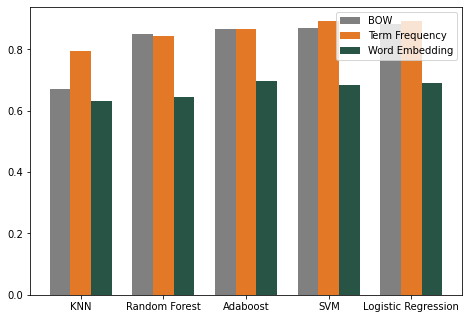

In [ ]:
BOW = [0.6708, 0.8504, 0.8648, 0.8684, 0.8804]
Term_Frequency = [0.7924, 0.8432, 0.8648, 0.8932, 0.8908]
Word_Embedding = [0.6304, 0.6456, 0.6972, 0.6824, 0.6888]
plot_digram(BOW, Term_Frequency, Word_Embedding)


* Plot the performance of Non Pre-Processed Data:



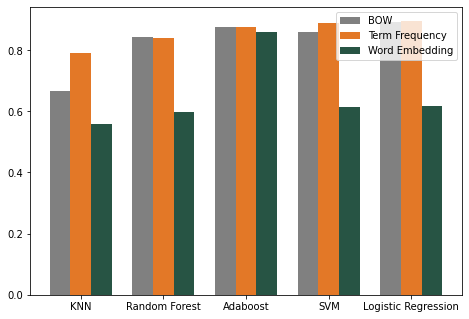

In [ ]:
BOW =            [0.666, 0.844, 0.8764, 0.8584, 0.8916]
Term_Frequency = [0.7912, 0.8392, 0.8756, 0.8896, 0.8968]
Word_Embedding = [0.56, 0.5968, 0.8596, 0.6124 , 0.6184]
plot_digram(BOW, Term_Frequency, Word_Embedding)

# Analysis



1. TF-IDF method has the best accuracy in most of the cases.
2. Pre-processing has a bigger effect on FastText than its effect on BOW and TF-IDF.
3. Logistic Regression and linear SVM are better than the other classifiers in most of the cases (with/without pre-processing).
4. Adaboost takes the longest time to classify the test set.
5. FastText takes long time in all cases.